In [2]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

df=pd.read_csv(r'C:\Users\Sandalika\Documents\deep learning workshop\cardio_dataset.csv')
df

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,1,48,236,66,0,1,0,1.1
1,0,48,260,51,0,1,1,7.0
2,0,44,187,49,1,1,0,7.0
3,1,42,216,57,1,1,0,0.4
4,1,56,156,42,0,1,0,2.2
...,...,...,...,...,...,...,...,...
6639,1,65,307,42,1,0,1,36.6
6640,1,42,169,56,0,0,0,0.8
6641,0,65,212,35,1,0,0,30.6
6642,0,66,184,39,0,0,0,23.8


In [10]:
dataset=df.values
data=dataset[:,0:7]
target=dataset[:,7]

In [16]:
from sklearn.preprocessing import MinMaxScaler
target=np.reshape(target, (-1,1))

scaler_data=MinMaxScaler()
scaler_target=MinMaxScaler()

#scaler_data.fit(data)
#scaler_target.fit(target)

data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)

In [18]:
print(data_scaled[:10])

[[1.         0.20512821 0.40045249 0.29347826 0.         1.
  0.        ]
 [0.         0.20512821 0.45475113 0.21195652 0.         1.
  1.        ]
 [0.         0.1025641  0.28959276 0.20108696 1.         1.
  0.        ]
 [1.         0.05128205 0.35520362 0.24456522 1.         1.
  0.        ]
 [1.         0.41025641 0.21945701 0.16304348 0.         1.
  0.        ]
 [0.         0.1025641  0.23303167 0.24456522 1.         1.
  0.        ]
 [0.         0.25641026 0.41855204 0.19021739 0.         1.
  0.        ]
 [0.         0.20512821 0.34615385 0.09782609 1.         1.
  0.        ]
 [1.         0.66666667 0.32352941 0.22282609 0.         1.
  1.        ]
 [0.         0.58974359 0.28733032 0.18478261 1.         1.
  0.        ]]


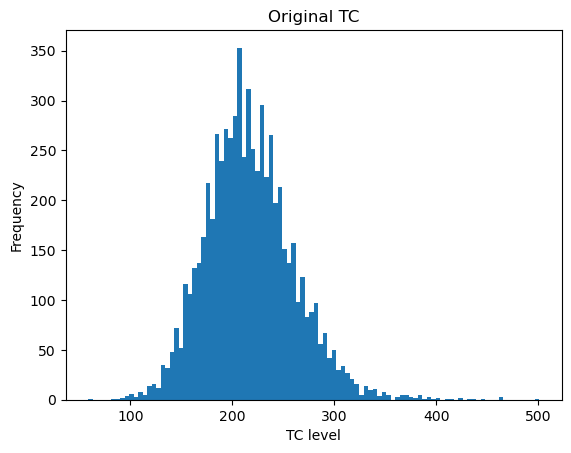

In [22]:
#dataset before scaling 
plt.hist(data[:,2],bins=100)
plt.title('Original TC')
plt.xlabel('TC level')
plt.ylabel('Frequency')
plt.show()

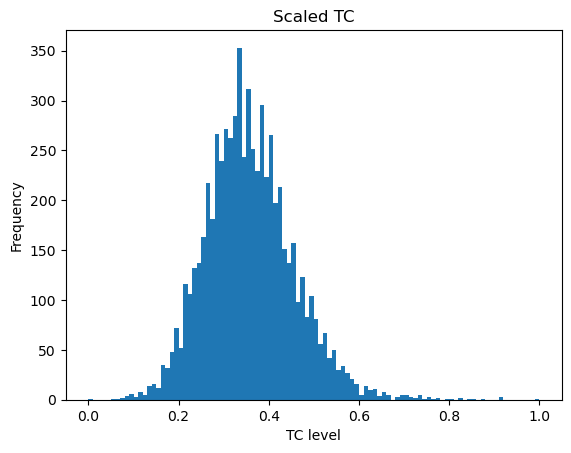

In [26]:
#dataset after scaling
plt.hist(data_scaled[:,2],bins=100)
plt.title('Scaled TC')
plt.xlabel('TC level')
plt.ylabel('Frequency')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target= train_test_split(data_scaled, target_scaled, test_size=0.2)

In [54]:
#FNN architecture
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model=Sequential()
model.add(Dense(128, input_dim=7, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
model.summary()

C:\Users\Sandalika\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,941 (38.83 KB)

 Trainable params: 9,941 (38.83 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history=model.fit(train_data, train_target,epochs=200,validation_split=0.2)

Epoch 1/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0408 - mae: 0.1460 - mse: 0.0408 - val_loss: 0.0177 - val_mae: 0.0796 - val_mse: 0.0177
Epoch 2/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0138 - mae: 0.0837 - mse: 0.0138 - val_loss: 0.0126 - val_mae: 0.0658 - val_mse: 0.0126
Epoch 3/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - mae: 0.0725 - mse: 0.0113 - val_loss: 0.0106 - val_mae: 0.0581 - val_mse: 0.0106
Epoch 4/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - mae: 0.0630 - mse: 0.0088 - val_loss: 0.0086 - val_mae: 0.0511 - val_mse: 0.0086
Epoch 5/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 - mae: 0.0562 - mse: 0.0071 - val_loss: 0.0080 - val_mae: 0.0492 - val_mse: 0.0080
Epoch 6/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0069 - mae: 0.0557 - mse: 0.0069 - val_loss: 0.0068 - val_mae: 0.0460 - val_mse: 0.0068
Epoch 7/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 - mae: 0.0540 - mse: 0.007

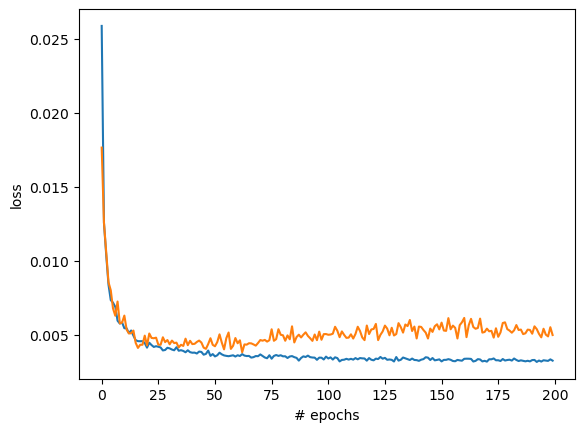

In [58]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [61]:
from sklearn.metrics import r2_score
predicted_result=model.predict(test_data)
r2=r2_score(test_target, predicted_result)
print('r2 score:',r2)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
r2 score: 0.8138187155756093


In [67]:
print('actual:', test_target[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.36107855 0.00820633 0.08323564 0.03985932 0.01641266 0.51699883
  0.77256741 0.7010551  0.08440797 0.02930832]]
predicted: [[0.26413107 0.05980197 0.10211675 0.07356019 0.05714763 0.34412816
  0.4372829  0.4550284  0.18022472 0.06361344]]


In [71]:
print('actual inverse scaled:', scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:', scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[30.9  0.8  7.2  3.5  1.5 44.2 66.  59.9  7.3  2.6]]
predicted inverse scaled: [[22.63038    5.201108   8.810558   6.3746843  4.974693  29.454132
  37.40023   38.913925  15.473168   5.526226 ]]


In [79]:
test_data=np.array([0,63,186,46,1,1,0]).reshape(1,-1)

In [81]:
scaled_test_data=scaler_data.transform(test_data)

In [83]:
result=model.predict(scaled_test_data)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0.22943223]]


In [85]:
result=scaler_target.inverse_transform(result)
print(result)

[[19.670568]]
